# Proyek Analisis Data: Air Quality
- **Nama:** Gheffira Tsuraya Gunawan
- **Email:** gheffira.tsuraya1003@mail.ugm.ac.id
- **ID Dicoding:** gheffira_tsuraya

## Menentukan Pertanyaan Bisnis

- Which station has the highest average pollutant concentration?
- How's the daily trend of pollutant concentration in the most polluted stations for each pollutant?

## Import Semua Packages/Library yang Digunakan

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.offline import iplot, init_notebook_mode

## Data Wrangling

### Gathering Data

In [114]:
data_aoti = pd.read_csv("data\PRSA_Data_Aotizhongxin_20130301-20170228.csv")
data_changping = pd.read_csv("data\PRSA_Data_Changping_20130301-20170228.csv")
data_dingling = pd.read_csv("data\PRSA_Data_Dingling_20130301-20170228.csv")
data_dongsi = pd.read_csv("data\PRSA_Data_Dongsi_20130301-20170228.csv")
data_guanyuan = pd.read_csv("data\PRSA_Data_Guanyuan_20130301-20170228.csv")
data_gucheng = pd.read_csv("data\PRSA_Data_Gucheng_20130301-20170228.csv")
data_huairou = pd.read_csv("data\PRSA_Data_Huairou_20130301-20170228.csv")
data_nongzha = pd.read_csv("data\PRSA_Data_Nongzhanguan_20130301-20170228.csv")
data_shunyi = pd.read_csv("data\PRSA_Data_Shunyi_20130301-20170228.csv")
data_tiantan = pd.read_csv("data\PRSA_Data_Tiantan_20130301-20170228.csv")
data_wanliu = pd.read_csv("data\PRSA_Data_Wanliu_20130301-20170228.csv")
data_wanshou = pd.read_csv("data\PRSA_Data_Wanshouxigong_20130301-20170228.csv")

### Assessing Data

Combines all data from various stations

In [115]:
data = [data_aoti, data_changping, data_dingling, data_dongsi, data_guanyuan, data_gucheng, data_huairou, data_nongzha, data_shunyi, data_tiantan, data_wanliu, data_wanshou]
data = pd.concat(data)
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


checking the information of data

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


Checking Missing Value

In [117]:
data.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Based on the checking results, there are many missing values.



Checking Duplicate Data

In [118]:
data.duplicated().sum()

0

### Cleaning Data

To do data cleaning, we must do what should we do to missing values.First we could checking the missing value percentage so that we could decide the next step

In [119]:
#checking the percentage of missing values from each variables to decide if we should drop all the missing values or not
missing_value_in_percent = 100 * data.isnull().sum() / len(data)
missing_value_in_percent

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64

Because the total missing values from various variabels are > 5%, it's not good to drop the missing values so we'll impute the missing values.

In [120]:
data1 = data.copy()
data1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [121]:
#Handling missing values
#Fill the missing values with the median value
for column in data1.columns[5:11]:  # Loop through column 5 until 10'
    data1[column] = data1.groupby('station')[column].transform(lambda x: x.fillna(x.median()))

In [122]:
#Handling missing values
#Fill the missing values with the mean value
for column in data1.columns[11:15]:  # Loop through column 11 until 14'
    data1[column] = data1.groupby('station')[column].transform(lambda x: x.fillna(x.mean()))

In [123]:
#Handling missing values by filling it with mode
data1['wd'] = data1['wd'].fillna(data1['wd'].mode()[0])

In [124]:
#Handling missing value by filling it with mean
mean_WSPM = data1['WSPM'].mean()
data1['WSPM'] = data1['WSPM'].fillna(mean_WSPM)

In [125]:
#Checking missing values
data1.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

In [126]:
data1.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.538931,1010.746341,2.490654,0.064475,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.064127,91.123375,21.456742,34.714968,1134.271612,55.830557,11.430737,10.469404,13.787251,0.820624,NaN,1.245914,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


make datetime variable

In [127]:
a = "2016-04-15T04:08:03.000+0000"
b = "Apr 15, 2016, 4:08:03 AM"

a = datetime.strptime(a, '%Y-%m-%dT%H:%M:%S.%f%z')
b = datetime.strptime(b, '%b %d, %Y, %I:%M:%S %p')
b = b.replace(tzinfo=a.tzinfo)

print(a.isoformat())
print(b.isoformat())

2016-04-15T04:08:03+00:00
2016-04-15T04:08:03+00:00


In [128]:
cols=["year","month","day","hour"]
data1['datetime'] = data1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [129]:
data1['datetime'] = pd.to_datetime(data1['datetime'], format = "%Y-%m-%d-%H")
data1['datetime']

0       2013-03-01 00:00:00
1       2013-03-01 01:00:00
2       2013-03-01 02:00:00
3       2013-03-01 03:00:00
4       2013-03-01 04:00:00
                ...        
35059   2017-02-28 19:00:00
35060   2017-02-28 20:00:00
35061   2017-02-28 21:00:00
35062   2017-02-28 22:00:00
35063   2017-02-28 23:00:00
Name: datetime, Length: 420768, dtype: datetime64[ns]

Resampling the time series data based on days

In [130]:
data1 = data1.set_index('datetime')
daily_resampled_data = data1.resample('D').sum() #D indicates days
daily_resampled_data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,,,,,,
2013-03-01,3600,579744,864,288,3312,2110.0,3625.0,2661.0000,6820.0000,120100.0,19568.1252,338.1,295652.1,-5802.8,0.0,840.3
2013-03-02,10512,579744,864,576,3312,9065.0,11734.0,9121.2688,16282.4837,272688.0,9396.1204,75.0,295647.2,-4686.3,0.0,329.8
2013-03-03,17424,579744,864,864,3312,22836.0,31998.0,14179.0000,21817.0000,509539.0,6563.0000,1514.1,292094.0,-3549.7,0.0,421.4
2013-03-04,24336,579744,864,1152,3312,6385.0,11749.0,5406.2832,12370.1194,210086.0,16368.0000,2767.9,292971.8,-3678.7,0.0,641.4
2013-03-05,31248,579744,864,1440,3312,36690.0,45860.0,20160.0000,28963.0000,580325.0,22904.0000,1909.6,291038.8,-2279.9,0.0,285.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-24,10067472,580896,576,6912,3312,7350.0,11173.0,2745.0000,12895.0000,206800.0,13225.0000,1404.5,293572.6,-3269.3,0.0,547.8
2017-02-25,10074384,580896,576,7200,3312,3523.0,6557.0,1623.0000,8851.0000,137800.0,16916.0000,2027.6,292942.2,-3048.8,0.0,590.7
2017-02-26,10081296,580896,576,7488,3312,8098.0,13111.0,2881.0000,14531.0000,203300.0,12190.0000,1949.5,293373.9,-2305.6,0.0,461.1


In [131]:
#Analyze the highest polluted stations
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'] 
most_polluted = []
for i in cols: 
  data = data1[[i, 'station']].groupby(['station']).mean().sort_values(i, ascending = False).iloc[0:5].reset_index()
  most_polluted.append(data) 

for i in range(len(cols)):
  print(most_polluted[i])
  print("--------------------------")

         station      PM2.5
0         Dongsi  85.655404
1  Wanshouxigong  84.527421
2   Nongzhanguan  84.375713
3        Gucheng  83.412651
4         Wanliu  83.109169
--------------------------
         station        PM10
0        Gucheng  118.646161
1  Wanshouxigong  111.930504
2         Wanliu  110.282666
3         Dongsi  109.952923
4   Aotizhongxin  109.588187
--------------------------
        station        SO2
0  Nongzhanguan  18.565999
1        Dongsi  18.369798
2        Wanliu  18.239118
3      Guanyuan  17.461290
4  Aotizhongxin  17.152554
--------------------------
        station        NO2
0        Wanliu  65.098314
1  Aotizhongxin  59.121859
2  Nongzhanguan  57.957107
3      Guanyuan  57.771932
4       Gucheng  55.759226
--------------------------
         station           CO
0  Wanshouxigong  1356.694302
1   Nongzhanguan  1309.754991
2        Gucheng  1307.034309
3         Dongsi  1299.974703
4         Wanliu  1297.682609
--------------------------
        station    

In [132]:
station_name = data1['station'].unique()
station_name

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [133]:
#analyze the average concentration of each pollutant in each station
avg_by_station = data1.groupby(by='station')['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean()
avg_by_station

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22924\3001203068.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,82.120075,109.588187,17.152554,59.121859,1244.561887,55.649690
Changping,70.545694,94.281790,14.816361,44.026443,1137.019279,57.734328
Dingling,65.434317,83.295585,11.609128,27.283320,887.400896,68.287028
Dongsi,85.655404,109.952923,18.369798,53.393550,1299.974703,56.962841
Guanyuan,82.512914,108.778322,17.461290,57.771932,1252.731776,55.300104
Gucheng,83.412651,118.646161,15.245193,55.759226,1307.034309,57.430945
Huairou,69.011408,90.984486,11.894565,32.146806,1013.528976,59.469384
Nongzhanguan,84.375713,108.690044,18.565999,57.957107,1309.754991,58.339367
Shunyi,78.853887,98.397308,13.255208,43.639911,1163.021504,54.683189


## Visualization & Explanatory Analysis

### Pertanyaan 1: Which station has the highest average pollutant concentration?

defining barplot function to see the average concentration of each pollutant in each station

In [148]:
def barplot(var):
    pollutant_avg = data1[['station',var]].groupby(["station"]).mean().sort_values(by = var, ascending = False).plot(kind='bar', xlabel='Stations',ylabel=f'Average Concentration of {var}', title=f'Average Concentration of {var}')


show the average concentration barplot of each pollutant in every stations

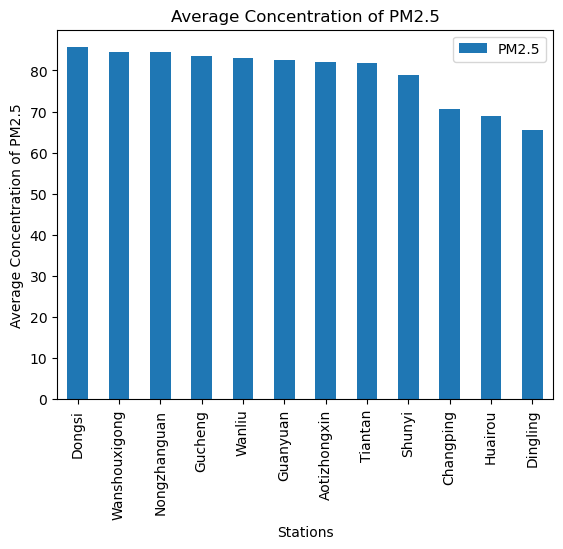

In [149]:
pm25_avg = barplot('PM2.5')
plt.show()

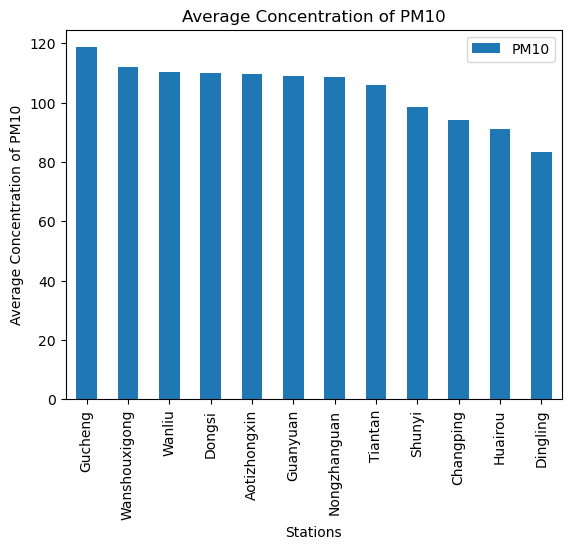

In [150]:
pm10_avg = barplot('PM10')
plt.show()

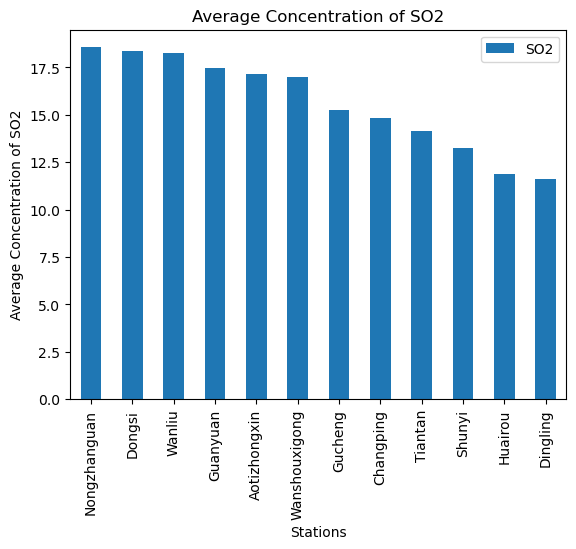

In [151]:
so2_avg = barplot('SO2')
plt.show()

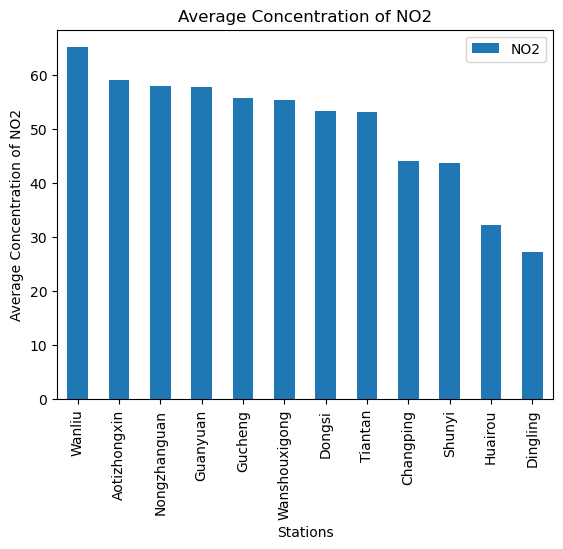

In [152]:
no2_avg = barplot('NO2')
plt.show()

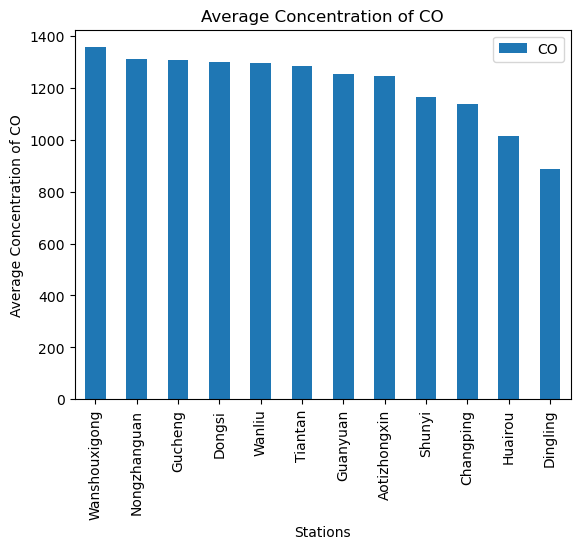

In [153]:
co_avg = barplot('CO')
plt.show()

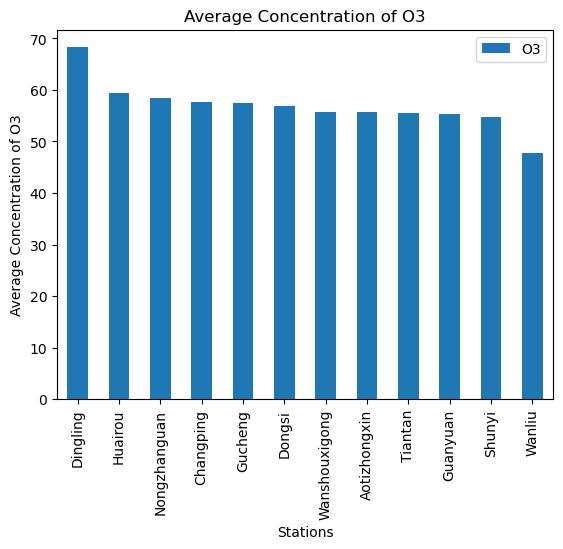

In [154]:
o3_avg = barplot('O3')
plt.show()

### Pertanyaan 2: How's the daily trend of pollutant concentration in the most polluted stations for each pollutant?

checking the data index

In [21]:
data1.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=420768, freq=None)

reset the index so the datetime is no longer an index and be a column

In [41]:
data1_reindex = data1.reset_index()
data1_reindex

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017-02-28 20:00:00,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017-02-28 21:00:00,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017-02-28 22:00:00,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


From question number 1, we know that the most polluted area by PM2.5 is Dongsi station, the most polluted area by PM10 is Gucheng station, the most polluted area by SO2 is Nongzhanguan station, the most polluted area by NO2 is Wanliu station, the most polluted area by CO is Wanshouzigong station, and the most polluted area by O3 is Dingling station. So, we will see the daily pollutant concentration trend in those area.

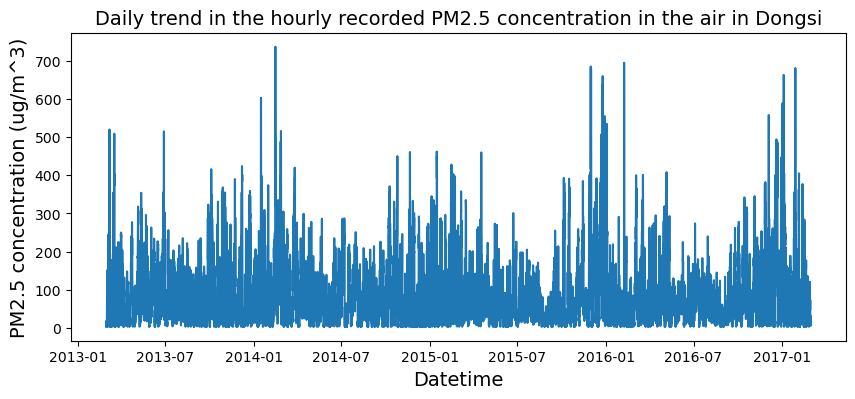

In [185]:
#PM2.5 - Dongsi
fig, ax = plt.subplots(figsize = (10,4))

ax = sns.lineplot(data = data1_reindex[data1_reindex['station']=='Dongsi'], x = 'datetime', y = 'PM2.5')

plt.xlabel('Datetime',fontsize=14)
plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
plt.title('Daily trend in the hourly recorded PM2.5 concentration in the air in Dongsi',fontsize=14)
plt.show()

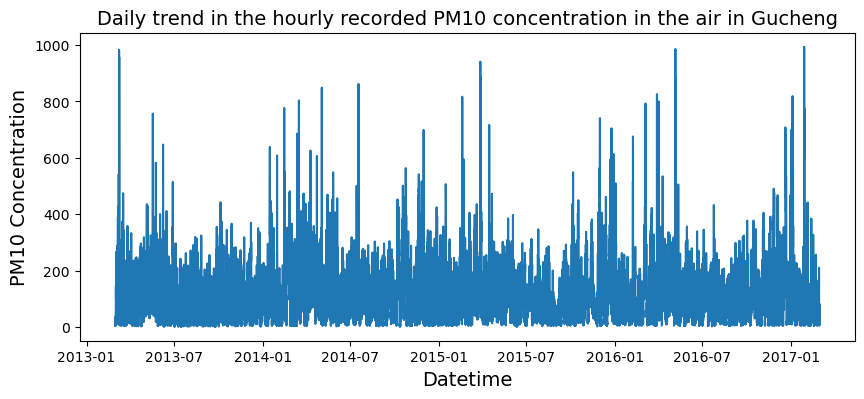

In [163]:
#PM10 - Gucheng
fig, ax = plt.subplots(figsize = (10,4))

ax = sns.lineplot(data = data1_reindex[data1_reindex['station']=='Gucheng'], x = 'datetime', y = 'PM10')

plt.xlabel('Datetime',fontsize=14)
plt.ylabel('PM10 Concentration',fontsize=14)
plt.title('Daily trend in the hourly recorded PM10 concentration in the air in Gucheng',fontsize=14)
plt.show()

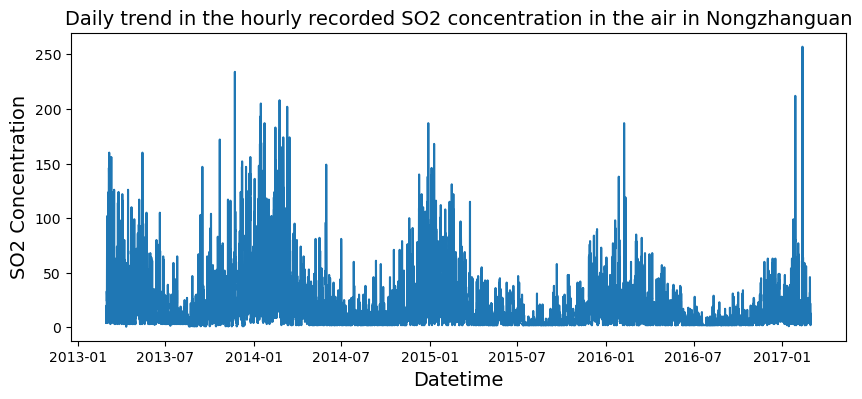

In [158]:
#SO2 - Nongzhanguan
fig, ax = plt.subplots(figsize = (10,4))

ax = sns.lineplot(data = data1_reindex[data1_reindex['station']=='Nongzhanguan'], x = 'datetime', y = 'SO2')

plt.xlabel('Datetime',fontsize=14)
plt.ylabel('SO2 Concentration',fontsize=14)
plt.title('Daily trend in the hourly recorded SO2 concentration in the air in Nongzhanguan',fontsize=14)
plt.show()

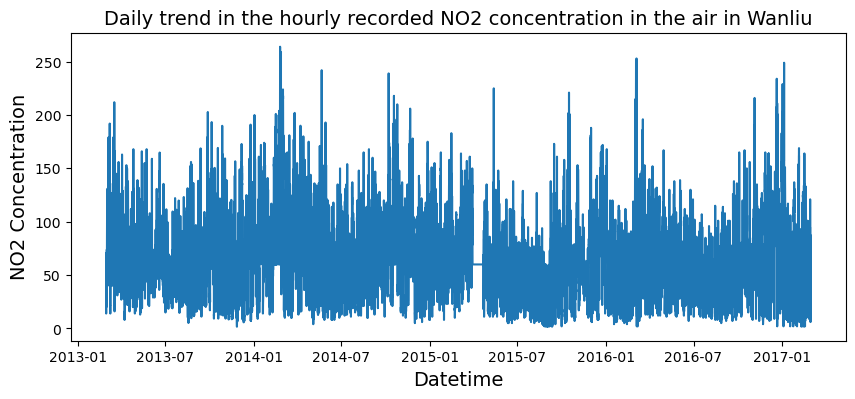

In [159]:
#NO2 - Wanliu
fig, ax = plt.subplots(figsize = (10,4))

ax = sns.lineplot(data = data1_reindex[data1_reindex['station']=='Wanliu'], x = 'datetime', y = 'NO2')

plt.xlabel('Datetime',fontsize=14)
plt.ylabel('NO2 Concentration',fontsize=14)
plt.title('Daily trend in the hourly recorded NO2 concentration in the air in Wanliu',fontsize=14)
plt.show()

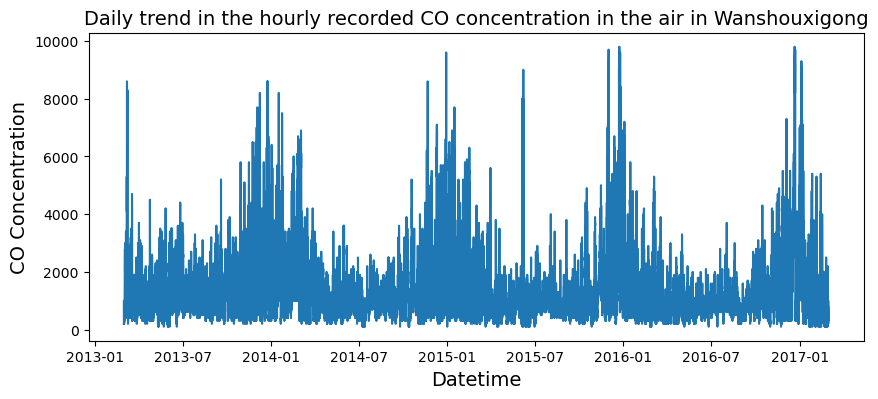

In [164]:
#CO - Wanshouxigong
fig, ax = plt.subplots(figsize = (10,4))

ax = sns.lineplot(data = data1_reindex[data1_reindex['station']=='Wanshouxigong'], x = 'datetime', y = 'CO')

plt.xlabel('Datetime',fontsize=14)
plt.ylabel('CO Concentration',fontsize=14)
plt.title('Daily trend in the hourly recorded CO concentration in the air in Wanshouxigong',fontsize=14)
plt.show()

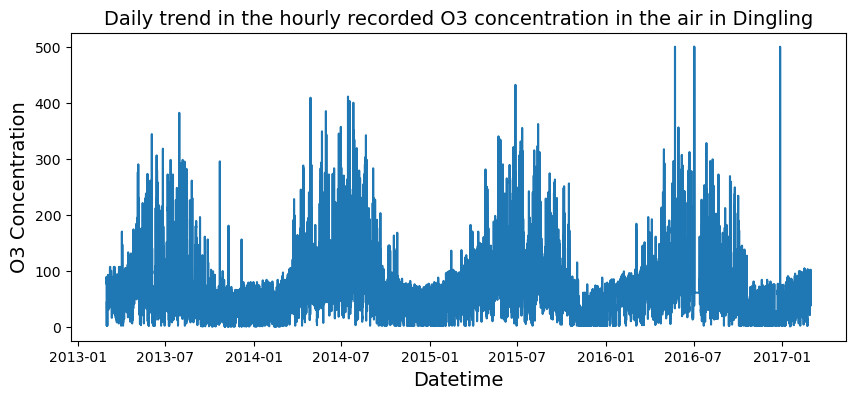

In [166]:
#O3 - Dingling
fig, ax = plt.subplots(figsize = (10,4))

ax = sns.lineplot(data = data1_reindex[data1_reindex['station']=='Dingling'], x = 'datetime', y = 'O3')

plt.xlabel('Datetime',fontsize=14)
plt.ylabel('O3 Concentration',fontsize=14)
plt.title('Daily trend in the hourly recorded O3 concentration in the air in Dingling',fontsize=14)
plt.show()

In [186]:
data1.to_csv("data1.csv", index=False)

## Conclusion

1. From the graphic, we know that the most polluted area by PM2.5 is Dongsi station, the most polluted area by PM10 is Gucheng station, the most polluted area by SO2 is Nongzhanguan station, the most polluted area by NO2 is Wanliu station, the most polluted area by CO is Wanshouzigong station, and the most polluted area by O3 is Dingling station. By the graphic, we also know the average concentration of each pollutant in each area (station) so that we could evaluate it. The information provided by the graphic could be used to evaluate the air quality of every station so that we know which area needs extra care. For example, the related parties could put more effort to decreasing the air pollution in the 5 stations that has been stated above first.

2. Based on the daily trend graph of pollutant concentrations in each area, it can be concluded:
- In the daily trend graph of PM2.5 concentrations in Dongsi, there is a seasonal trend in the graph where from the beginning to the middle of every year, the PM2.5 concentration trend increases, and from the middle to the end year, it decreases. The peak trend of each year is fluctuative
- In the daily trend graph of PM10 concentration in Gucheng, there is a seasonal trend in the graph where every start to the middle of the year the PM10 concentration trend increases, and from the middle to the end of the year it decreases. Starting in 2015, the peak trend has increased every year
- In the daily trend graph of PM2.5 concentrations in Dongsi, there is a seasonal trend in the graph where from the beginning to the middle of every year the PM2.5 concentration trend increases, and from the middle to the end of the year it decreases. The peak trend of each year is fluctuative
- In the daily trend graph of SO2 concentration in Nongzhanguan, there is a seasonal trend in the graph where from the beginning to the middle of each year the SO2 concentration trend decreases, and from the middle to the end of the year it increases. The peak trend of each year is fluctuative
- In the daily trend graph of NO2 concentration in Wanliu, there is no visible trend in the graph indicating that the NO2 concentration in Wanliu is fluctuating.
- In the daily trend graph of CO concentration in Wanshouxigong, there is a seasonal trend in the graph where every start to the middle of the year the CO concentration trend decreases, and from the middle to the end of the year it increases. The peak of the trend from year to year is increasing
- In the daily trend graph of O3 concentration in Dingling, there is a seasonal trend in the graph where from the beginning to the middle of each year the O3 concentration trend increases, and from the middle to the end it decreases. The peak of the trend from year to year is increasing.